In [1]:
import numpy as np
from numpy.linalg import eigh, inv, svd, norm
import matplotlib.pyplot as plt
from matplotlib.image import imread

patch_size = 16

X_ica = np.zeros((patch_size*patch_size, 40000))
idx = 0
for s in range(1, 5):
    #转换为浮点型
    image = imread("./images/{}.jpg".format(s)).astype(np.float32)
    #获得数据维度
    a, b, c = np.shape(image)
    y = a
    x = b * c
    #注意这里order要选择F
    image = image.reshape(y, x, order="F")
    for i in range(1, y//patch_size+1):
        for j in range(1, x//patch_size+1):
            patch = image[(i-1)*patch_size: i*patch_size, (j-1)*patch_size: j*patch_size]
            X_ica[:, idx] = patch.reshape(-1, 1, order="F").flatten()
            idx += 1      
    
X_ica = X_ica[:, 0: idx]

#正定矩阵分解
W = 1 / X_ica.shape[1] * X_ica.dot(X_ica.T)
w, v = eigh(W)
w = np.diag(1 / np.sqrt(w))
W_z = v.dot(w).dot(v.T)

X_ica = X_ica - np.mean(X_ica, axis=1).reshape(-1, 1)
X_pca = X_ica

X_ica = 2 * W_z.dot(X_ica)
X_pca = X_pca / np.std(X_pca, axis=1).reshape(-1, 1)

之前为预处理函数，可以忽略细节。

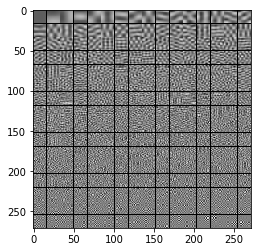

In [2]:
#### PCA
def pca(X):
    U, S, V = svd(X.dot(X.T))
    
    return U
    
def plot_pca_filters(U):
    n = (patch_size + 1) * patch_size - 1
    big_filters = np.min(U) * np.ones((n, n))
    for i in range(patch_size):
        for j in range(patch_size):
            big_filters[i*(patch_size+1): (i+1)*(patch_size+1)-1, j*(patch_size+1): (j+1)*(patch_size+1)-1] = U[:, i*patch_size+j].reshape(patch_size, patch_size)
            
    plt.imshow(big_filters)
    plt.gray()
    plt.show()
    
U = pca(X_pca)
plot_pca_filters(U)

第1轮
第2轮
第3轮
第4轮
第5轮
第6轮
第7轮
第8轮
第9轮
第10轮


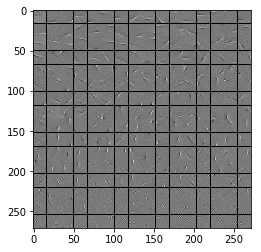

In [3]:
#### ICA
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = X_ica.copy()

X = X.T
n, d = X.shape
W = np.eye(d)
batch = 100
alpha = 0.0005
eps = 1e-1

for i in range(10):
    print("第{}轮".format(i+1))
    np.random.permutation(X)
    for j in range(n // batch):
        X1 = X[j * batch: (j+1) * batch, :]
        WX = W.dot(X1.T)
        grad = (1 - 2 * sigmoid(WX)).dot(X1) + batch * inv(W.T)
        W += alpha * grad


def plot_ica_filters(W):
    F = W.dot(W_z)
    norms = norm(F, axis=1)
    idxs = np.argsort(norms)
    norms = np.sort(norms)
    n = (patch_size + 1) * patch_size - 1
    big_filters = np.min(W) * np.ones((n, n))
    for i in range(patch_size):
        for j in range(patch_size):
            temp = W[idxs[i*patch_size+j], :].reshape(patch_size, patch_size)
            big_filters[i*(patch_size+1): (i+1)*(patch_size+1)-1, j*(patch_size+1): (j+1)*(patch_size+1)-1] = temp
            
    plt.imshow(big_filters)
    plt.gray()
    plt.show()
    
plot_ica_filters(W)